# First Contact

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

## Shape of the data arrays
The data is always a 2D array, shape (n_samples, n_features), although the original data may have had a different shape. In the case of the digits, each original sample is an image of shape (8, 8) and can be accessed using:

In [5]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [3]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [4]:
digits.data.shape

(1797, 64)

In [6]:
digits.images[0].shape

(8, 8)

## Show data distribution

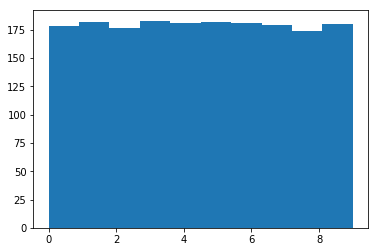

In [8]:
import matplotlib.pyplot as plt 
plt.hist(digits.target, 10)
plt.show()

## Show image samples

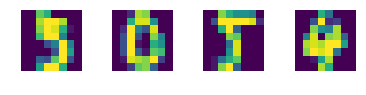

In [9]:
samples = [5, 252, 808, 1512]

# Fill out the subplots with the random images that you defined 
for i in range(len(samples)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(digits.images[samples[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

## Our first classifier

In [10]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-1], digits.target[:-1]) 

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Using our classifier

In [11]:
clf.predict(digits.data[-1:]), digits.target[-1]

(array([8]), 8)

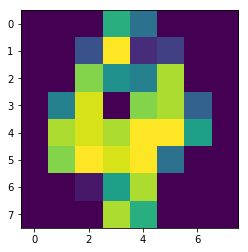

In [12]:
plt.imshow(digits.images[samples[-1]])
plt.show()

## Persisting our model (using pickle)

In [13]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(digits.data[0:1])

array([0])

## Persisting our model (using joblib)

In [14]:
from sklearn.externals import joblib
joblib.dump(clf, '../models/day1/digits/svc.pkl') 

['../models/day1/digits/svc.pkl']

In [16]:
clf = joblib.load('../models/day1/digits/svc.pkl') 
clf

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)